In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

import os
import matplotlib.pyplot as plt
import time
import statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data = pd.read_csv("C:/Users/ekant/Desktop/test_data.csv")

In [5]:
data.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11


In [6]:
data['norm_time'] = pd.to_datetime(data['time'], unit='s')

In [7]:
data.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date,norm_time
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08,2019-04-08 17:22:25
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12,2019-04-12 21:10:58
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16,2019-04-16 08:16:41
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09,2019-04-09 15:07:59
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11,2019-04-11 07:11:57


In [8]:
data['count_event'] = 1

In [196]:
data.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date,count_event,norm_time
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08,1,2019-04-08 17:22:25
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12,1,2019-04-12 21:10:58
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16,1,2019-04-16 08:16:41
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09,1,2019-04-09 15:07:59
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11,1,2019-04-11 07:11:57


In [9]:
df = data[['date', 'count_event']]
df1 = df.groupby(['date']).count()
df = df1.reset_index()
df

,date,count_event
0,2019-04-01,5172
1,2019-04-02,5269
2,2019-04-03,5357
3,2019-04-04,5108
4,2019-04-05,5305
5,2019-04-06,3955
6,2019-04-07,4091
7,2019-04-08,8902
8,2019-04-09,7963
9,2019-04-10,7098


In [10]:
x = df.loc[:, 'date']
y = df.loc[:, 'count_event']
x

0     2019-04-01
1     2019-04-02
2     2019-04-03
3     2019-04-04
4     2019-04-05
5     2019-04-06
6     2019-04-07
7     2019-04-08
8     2019-04-09
9     2019-04-10
10    2019-04-11
11    2019-04-12
12    2019-04-13
13    2019-04-14
14    2019-04-15
15    2019-04-16
Name: date, dtype: object

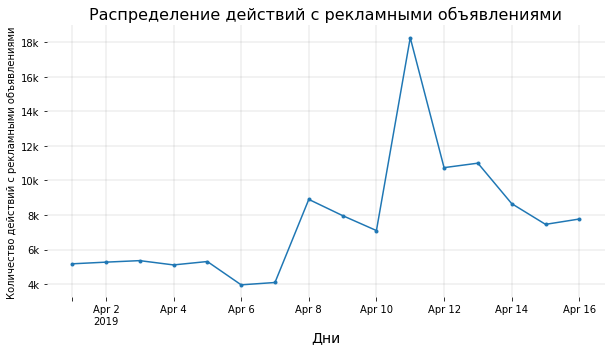

In [11]:
plt.figure(figsize=(10,5), frameon=False, edgecolor = 'w' )
ax=plt.gca()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.plot(x, y, marker='.')
plt.grid(True, color='grey', linestyle='-', linewidth=0.2)
plt.title('Распределение действий с рекламными объявлениями', fontsize=16)
plt.xlabel('Дни', fontsize=14)
plt.ylabel("Количество действий с рекламными объявлениями", fontsize=10)
plt.xticks([0, 1, 3, 5, 7, 9, 11, 13, 15], 
           ('', 'Apr 2\n2019', 'Apr 4', 'Apr 6', 'Apr 8', 'Apr 10', 'Apr 12', 'Apr 14', 'Apr 16' ))
labels = (map(int, ax.get_yticks()/1000))
new_labels = [str(i)+'k'  for i in labels]
ax.set_yticklabels(new_labels)
plt.show()

In [166]:
data.head()

,time,event,ad_cost_type,has_video,agency_union_id,client_union_id,campaign_union_id,ad_id,platform,date,count,count_event
0,1.554744e+09,report,CPM,0,no_agency,client_21074,campaign_27489,ad_27489,android,2019-04-08,1,1
1,1.555103e+09,click,CPM,0,no_agency,client_22392,campaign_35893,ad_35893,android,2019-04-12,1,1
2,1.555403e+09,click,CPM,0,no_agency,client_16836,campaign_26799,ad_26804,web,2019-04-16,1,1
3,1.554822e+09,click,CPM,0,no_agency,client_22920,campaign_37146,ad_37146,android,2019-04-09,1,1
4,1.554967e+09,click,CPM,0,no_agency,client_645,campaign_15893,ad_15944,web,2019-04-11,1,1


In [220]:
df2 = data.groupby(['date', 'event', 'campaign_union_id', 'ad_id']).count()
df2 = df2.reset_index()
df3 = df2.loc[:, df2.columns.intersection(['date','event', 'campaign_union_id', 'ad_id', 'count_event'])]
df3.head()

,date,event,campaign_union_id,ad_id,count_event
0,2019-04-01,click,campaign_101832,ad_101832,1
1,2019-04-01,click,campaign_102507,ad_102507,4
2,2019-04-01,click,campaign_102525,ad_102525,1
3,2019-04-01,click,campaign_104409,ad_104413,1
4,2019-04-01,click,campaign_104443,ad_104443,1


In [223]:
 np.where(df3['count_event']== df3['count_event'].max())

(array([25372], dtype=int64),)

In [227]:
df3['count_event'].max()

9631

In [230]:
df3[df3['count_event'] == 9631]

,date,event,campaign_union_id,ad_id,count_event
25372,2019-04-11,view,campaign_49554,ad_49554,9631


In [3]:
import pandas as pd

views = data[(data['date'] == '2019-04-11') & (data['event'] == 'view')]
views.groupby('ad_id').size().sort_values(ascending = False).head(10)

ad_id
ad_49554    9631
ad_49556    3454
ad_49560     512
ad_49564     334
ad_388       101
ad_47269      79
ad_99303      69
ad_387        42
ad_1181       38
ad_3021       26
dtype: int64

2. Найдите причину резкого увеличения количества рекламных событий и объясните, что произошло. 
 Причина резкого увелечения количества рекламных событий - рекламная кампания 49554. Стоит отметить, что повысилась активность только просмотров. Другие категории остались в пределах нормы. Резкий рост начался после того, как было запущено объявление ad_49554. Данное объявление имеет тип трат CPC. Можно предположить, что так как был выбран этот тип трат, то стоимость товара высокая, и клиент старался прощупать аудиторию, и при запуске менял цену за клик, вначале установив очень высокую, что по
системе аукциона, дало ему очень большой охват и просмотры. И позже постепенно снижал.

Дальше мы узнаем, что это новые объявления с большим бюджетом, запущенные крупным рекламным агентством.

Мы действительно сталкиваемся с такими событиями на графиках рекламной статистики. На поведение различных метрик могут значительно влиять такие факторы, как день недели, близость праздников, запуск крупных рекламных кампаний и т.д.